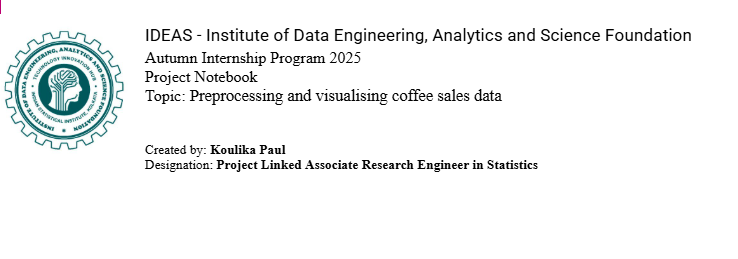

In [60]:
from google.colab import files
uploaded=files.upload()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Saving Coffe_sales.csv to Coffe_sales (2).csv


In [61]:
coffee_data=pd.read_csv("Coffe_sales.csv", on_bad_lines='warn')
coffee_data

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.70,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.90,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.70,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000
...,...,...,...,...,...,...,...,...,...,...,...
3542,10,card,35.76,Cappuccino,Morning,Sun,Mar,7,3,2025-03-23,10:34:54.894000
3543,14,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,2025-03-23,14:43:37.362000
3544,14,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,2025-03-23,14:44:16.864000
3545,15,card,25.96,Americano,Afternoon,Sun,Mar,7,3,2025-03-23,15:47:28.723000


**Q1. Find the number of columns, duplicate columns, and missing values**

In [62]:
no_of_rows=coffee_data.shape[0]
print(f"no of rows:{no_of_rows}")

duplicate_row=coffee_data.duplicated().sum()
print(f"no of duplicate rows:{duplicate_row}")

no_of_columns=coffee_data.shape[1]
print(f"no of columns:{no_of_columns}")


duplicate_col=coffee_data.columns.duplicated().sum()
print(f"no of duplicate columns:{duplicate_col}")

missing_values=coffee_data.isnull().sum()
print(f"missing values:{missing_values}")

no of rows:3547
no of duplicate rows:0
no of columns:11
no of duplicate columns:0
missing values:hour_of_day    0
cash_type      0
money          0
coffee_name    0
Time_of_Day    0
Weekday        0
Month_name     0
Weekdaysort    0
Monthsort      0
Date           0
Time           0
dtype: int64


***Basic statistics of the data***

In [63]:
coffee_data.describe()

,hour_of_day,money,Weekdaysort,Monthsort
count,3547.000000,3547.000000,3547.000000,3547.000000
mean,14.185791,31.645216,3.845785,6.453905
std,4.234010,4.877754,1.971501,3.500754
min,6.000000,18.120000,1.000000,1.000000
25%,10.000000,27.920000,2.000000,3.000000
50%,14.000000,32.820000,4.000000,7.000000
75%,18.000000,35.760000,6.000000,10.000000
max,22.000000,38.700000,7.000000,12.000000


In [64]:
coffee_data.dtypes

,0
hour_of_day,int64
cash_type,object
money,float64
coffee_name,object
Time_of_Day,object
Weekday,object
Month_name,object
Weekdaysort,int64
Monthsort,int64
Date,object


In [65]:
coffee_data['Date']= pd.to_datetime(coffee_data['Date']) ## converting the object datatype to datetime
coffee_data['Month']=coffee_data['Date'].dt.month
coffee_data['Year']=(coffee_data['Date'].dt.year).astype('int')

***Average money for each year***

In [66]:
# extract year from date
#coffee_data['Year']=coffee_data['Date'].dt.year

grouped_data=coffee_data.groupby('Year')['money'].agg(np.mean)
grouped_data

/tmp/ipython-input-879389554.py:4: FutureWarning: The provided callable <function mean at 0x7d42a192c9a0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  grouped_data=coffee_data.groupby('Year')['money'].agg(np.mean)


,money
Year,
2024,31.737634
2025,31.390011


**Q2. Find the datatype of grouped_data**

In [67]:
grouped_data.dtypes

dtype('float64')

**Q3. Find the maximum money for each month**

In [68]:
#coffee_data['Year']=coffee_data['Date'].dt.year
#max_money_per_month=coffee_data.groupby('Month')['money'].max()
#display(max_money_for_each_month)

max_money_for_each_month=coffee_data.groupby(['Year','Month','Month_name'])['money'].max()
display(max_money_for_each_month)


Year  Month  Month_name
2024  3      Mar           38.70
      4      Apr           38.70
      5      May           37.72
      6      Jun           37.72
      7      Jul           37.72
      8      Aug           32.82
      9      Sep           35.76
      10     Oct           35.76
      11     Nov           35.76
      12     Dec           35.76
2025  1      Jan           35.76
      2      Feb           35.76
      3      Mar           35.76
Name: money, dtype: float64

***Distribution of money over months***

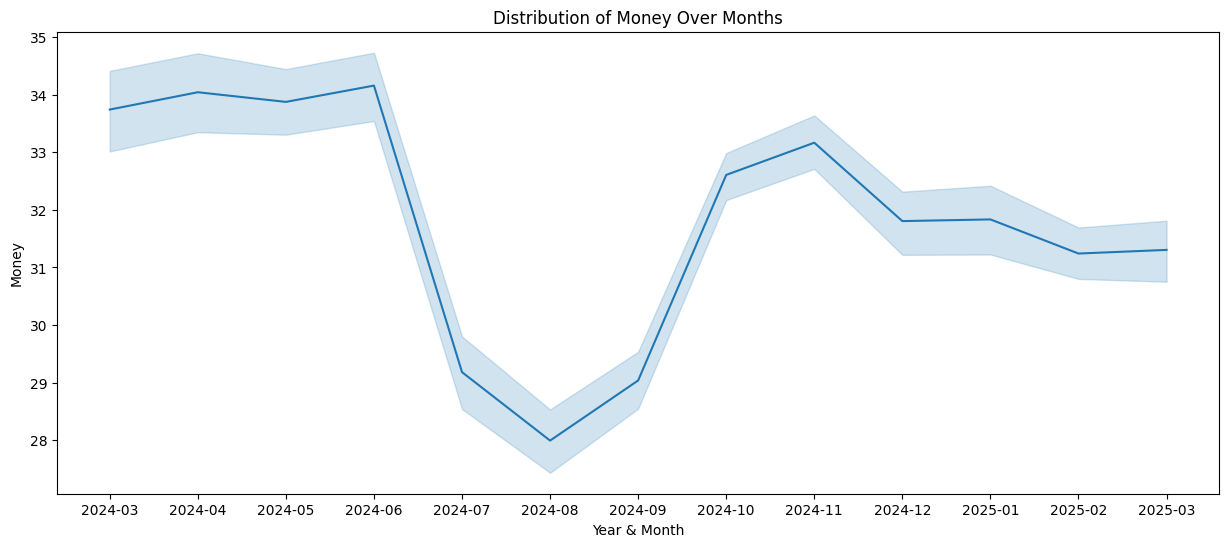

In [69]:
#sns.lineplot(x='Month',y='money',data=coffee_data)
#plt.show()

coffee_data['YearMonth'] = coffee_data['Date'].dt.strftime('%Y-%m')
plt.figure(figsize=(15,6))
plot_months=sns.lineplot(x='YearMonth',y='money',data=coffee_data)
plot_months.set_xlabel("Year & Month")
plot_months.set_ylabel("Money")
plot_months.set_title("Distribution of Money Over Months")
plt.show()

***The density of money over years***

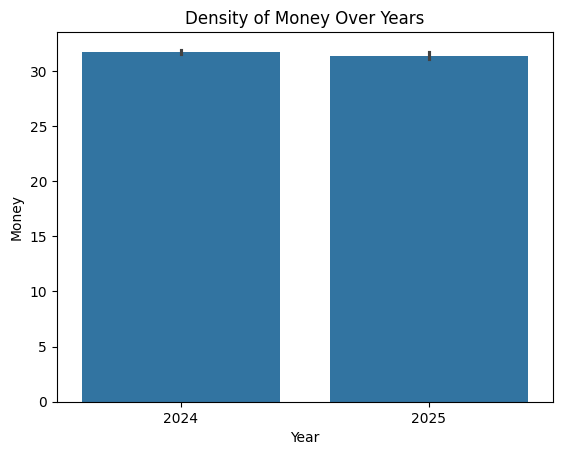

In [70]:
plot_years=sns.barplot(data= coffee_data,x='Year',y= coffee_data['money'])
plot_years.set_ylabel("Money")
plot_years.set_title("Density of Money Over Years")
plt.show()


**Q4. Find the distribution of money over coffee names**


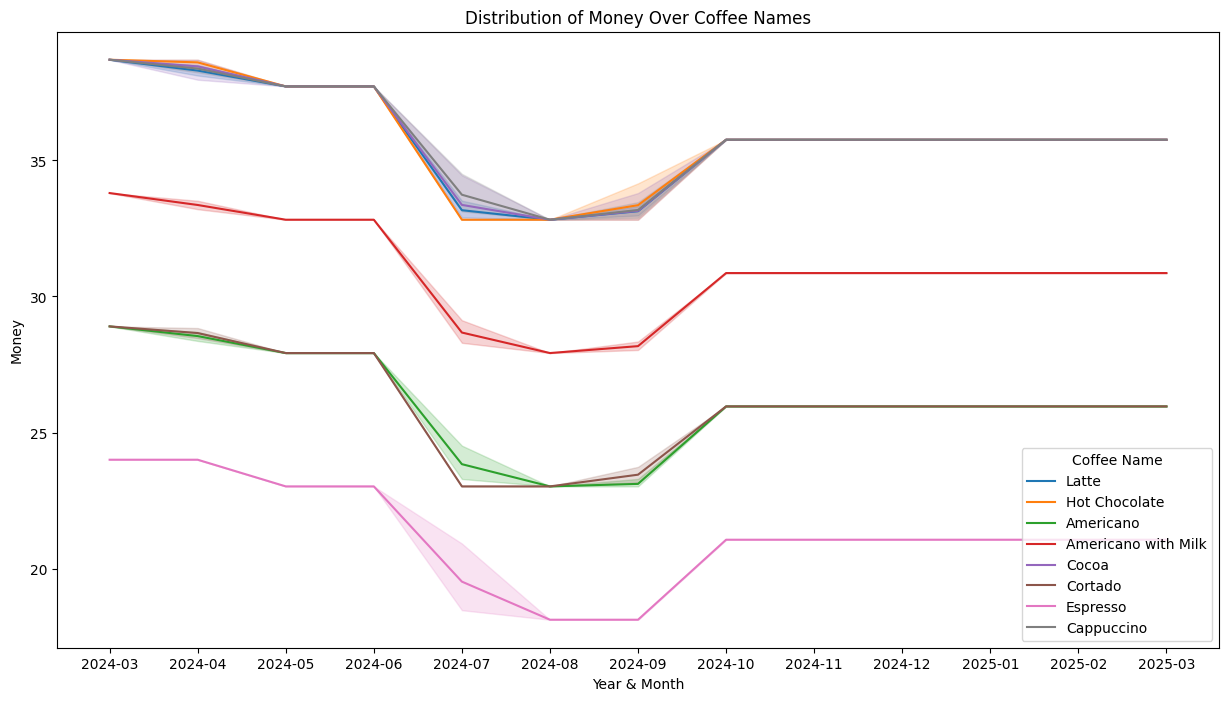

In [71]:
monthly_data=coffee_data.groupby(['Year','Month','Month_name','coffee_name'])['money'].sum()
monthly_data
plt.figure(figsize=(15,8))
plot_coffee=sns.lineplot(x='YearMonth',y='money', hue='coffee_name', data=coffee_data)
plt.legend(title="Coffee Name")
plot_coffee.set_xlabel("Year & Month")
plot_coffee.set_ylabel("Money")
plot_coffee.set_title("Distribution of Money Over Coffee Names")

plt.show()

***Times of the Day the dataset holds***

In [72]:
coffee_data['Time_of_Day'].value_counts()

,count
Time_of_Day,
Afternoon,1205
Morning,1181
Night,1161


**Q5. How many types of coffees are present in the dataset?**

In [73]:
#To know coffee names
types_of_coffee=coffee_data['coffee_name'].unique()
types_of_coffee

#To know no of coffee types
no_of_types_of_coffee=coffee_data['coffee_name'].nunique()
no_of_types_of_coffee

# count_of_coffee_name=coffee_data['coffee_name'].value_counts()
# count_of_coffee_name

8

***Max money from coffee_name***

In [74]:
coffee_data.groupby('coffee_name')['money'].max()

,money
coffee_name,
Americano,28.9
Americano with Milk,33.8
Cappuccino,38.7
Cocoa,38.7
Cortado,28.9
Espresso,24.0
Hot Chocolate,38.7
Latte,38.7


**Q6. Find the average money made at what time of the day.**

In [75]:
avg_money_at_diff_times_of_day=coffee_data.groupby('Time_of_Day')['money'].mean()
avg_money_at_diff_times_of_day

,money
Time_of_Day,
Afternoon,31.643187
Morning,30.422693
Night,32.890904


In [76]:
max_money=coffee_data['money'].max()
print(max_money)
min_money=coffee_data['money'].min()
min_money

38.7


18.12

***Generate 100 synthetic data rows***

In [77]:

import random
from datetime import timedelta, datetime
# date_range= date_range = pd.date_range(start="2023-01-01", periods=100, freq="D")
# values = np.cumsum(np.random.randn(100))
# df = pd.DataFrame({"date": date_range, "value": values})
# df
#----------------------------------------------------------------------------------
money_min, money_max=coffee_data['money'].min(), coffee_data['money'].max()
time_of_day_min, time_of_day_max=coffee_data['Time_of_Day'].min(), coffee_data['Time_of_Day'].max()
hour_of_day_min, hour_of_day_max=coffee_data['hour_of_day'].min(), coffee_data['hour_of_day'].max()
types_of_coffee=coffee_data['coffee_name'].unique()

#parameters
start_date= datetime(2023, 1, 1)
n = 100
time_of_the_day_choices = ["Morning", "Afternoon", "Night"]

#Generate Dataset
data = []
for i in range(n):
  current_date= start_date + timedelta(days=i)
  row={
      "Date": current_date.strftime("%Y-%m-%d"),
      "Weekday": current_date.strftime("%A"),
      "Month_name": current_date.strftime("%b"),
      "money":random.uniform(money_min, money_max),
      "hour_of_day":random.randint(hour_of_day_min, hour_of_day_max),
      "Time_of_Day": random.choice(time_of_the_day_choices),
      "coffee_name": random.choice(types_of_coffee)
  }
  data.append(row)

synthetic_data=pd.DataFrame(data)
synthetic_data








,Date,Weekday,Month_name,money,hour_of_day,Time_of_Day,coffee_name
0,2023-01-01,Sunday,Jan,19.955339,21,Night,Cocoa
1,2023-01-02,Monday,Jan,28.726827,8,Night,Cortado
2,2023-01-03,Tuesday,Jan,18.198722,15,Afternoon,Hot Chocolate
3,2023-01-04,Wednesday,Jan,22.851240,9,Morning,Americano
4,2023-01-05,Thursday,Jan,24.803775,22,Night,Cappuccino
...,...,...,...,...,...,...,...
95,2023-04-06,Thursday,Apr,21.314449,21,Morning,Cocoa
96,2023-04-07,Friday,Apr,31.087657,10,Morning,Espresso
97,2023-04-08,Saturday,Apr,31.685571,14,Night,Cocoa
98,2023-04-09,Sunday,Apr,28.869631,18,Night,Cappuccino


**Q7. Insert synthetic data into the given data set and analyse as above.**

In [78]:
#combining both the data in memory:
original_df=pd.read_csv("Coffe_sales.csv", on_bad_lines='warn')
combined_data=pd.concat([synthetic_data, original_df], ignore_index=True)
combined_data

/usr/local/lib/python3.12/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Date,Weekday,Month_name,money,hour_of_day,Time_of_Day,coffee_name,cash_type,Weekdaysort,Monthsort,Time
0,2023-01-01,Sunday,Jan,19.955339,21,Night,Cocoa,NaN,NaN,NaN,NaN
1,2023-01-02,Monday,Jan,28.726827,8,Night,Cortado,NaN,NaN,NaN,NaN
2,2023-01-03,Tuesday,Jan,18.198722,15,Afternoon,Hot Chocolate,NaN,NaN,NaN,NaN
3,2023-01-04,Wednesday,Jan,22.851240,9,Morning,Americano,NaN,NaN,NaN,NaN
4,2023-01-05,Thursday,Jan,24.803775,22,Night,Cappuccino,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3642,2025-03-23,Sun,Mar,35.760000,10,Morning,Cappuccino,card,7.0,3.0,10:34:54.894000
3643,2025-03-23,Sun,Mar,35.760000,14,Afternoon,Cocoa,card,7.0,3.0,14:43:37.362000
3644,2025-03-23,Sun,Mar,35.760000,14,Afternoon,Cocoa,card,7.0,3.0,14:44:16.864000
3645,2025-03-23,Sun,Mar,25.960000,15,Afternoon,Americano,card,7.0,3.0,15:47:28.723000


In [79]:
# Q8. Synthetic Data: Find the number of columns, duplicate columns, and missing values
no_of_rows=combined_data.shape[0]
print(f"no of rows:{no_of_rows}")

duplicate_row=combined_data.duplicated().sum()
print(f"no of duplicate rows:{duplicate_row}")

no_of_columns=combined_data.shape[1]
print(f"no of columns:{no_of_columns}")


duplicate_col=combined_data.columns.duplicated().sum()
print(f"no of duplicate columns:{duplicate_col}")

missing_values=combined_data.isnull().sum()
print(f"missing values:{missing_values}")


no of rows:3647
no of duplicate rows:0
no of columns:11
no of duplicate columns:0
missing values:Date             0
Weekday          0
Month_name       0
money            0
hour_of_day      0
Time_of_Day      0
coffee_name      0
cash_type      100
Weekdaysort    100
Monthsort      100
Time           100
dtype: int64


In [80]:
#9 Basic statistics of the data
combined_data.describe()

,money,hour_of_day,Weekdaysort,Monthsort
count,3647.000000,3647.000000,3547.000000,3547.000000
mean,31.559545,14.186729,3.845785,6.453905
std,4.921120,4.257736,1.971501,3.500754
min,18.120000,6.000000,1.000000,1.000000
25%,27.920000,10.000000,2.000000,3.000000
50%,32.820000,14.000000,4.000000,7.000000
75%,35.760000,18.000000,6.000000,10.000000
max,38.700000,22.000000,7.000000,12.000000


In [81]:
#Q10. Find the datatype of grouped_data
combined_data.dtypes


,0
Date,object
Weekday,object
Month_name,object
money,float64
hour_of_day,int64
Time_of_Day,object
coffee_name,object
cash_type,object
Weekdaysort,float64
Monthsort,float64


In [82]:
 ##11 converting the object datatype to datetime
combined_data['Date']= pd.to_datetime(combined_data['Date'])
combined_data['Month']=combined_data['Date'].dt.month
combined_data['Year']=(combined_data['Date'].dt.year).astype('int')

In [83]:
#12 Average money for each year
combined_grouped_data=combined_data.groupby('Year')['money'].agg(np.mean)
combined_grouped_data

/tmp/ipython-input-3336254608.py:2: FutureWarning: The provided callable <function mean at 0x7d42a192c9a0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  combined_grouped_data=combined_data.groupby('Year')['money'].agg(np.mean)


,money
Year,
2023,28.520802
2024,31.737634
2025,31.390011


In [84]:
# Q13. Find the datatype of grouped_data
combined_grouped_data.dtypes

dtype('float64')

In [85]:
# Q14. Find the maximum money for each month
max_money_for_each_month=combined_data.groupby(['Year','Month','Month_name'])['money'].max()
display(max_money_for_each_month)


Year  Month  Month_name
2023  1      Jan           37.223286
      2      Feb           37.892418
      3      Mar           38.399654
      4      Apr           37.594860
2024  3      Mar           38.700000
      4      Apr           38.700000
      5      May           37.720000
      6      Jun           37.720000
      7      Jul           37.720000
      8      Aug           32.820000
      9      Sep           35.760000
      10     Oct           35.760000
      11     Nov           35.760000
      12     Dec           35.760000
2025  1      Jan           35.760000
      2      Feb           35.760000
      3      Mar           35.760000
Name: money, dtype: float64

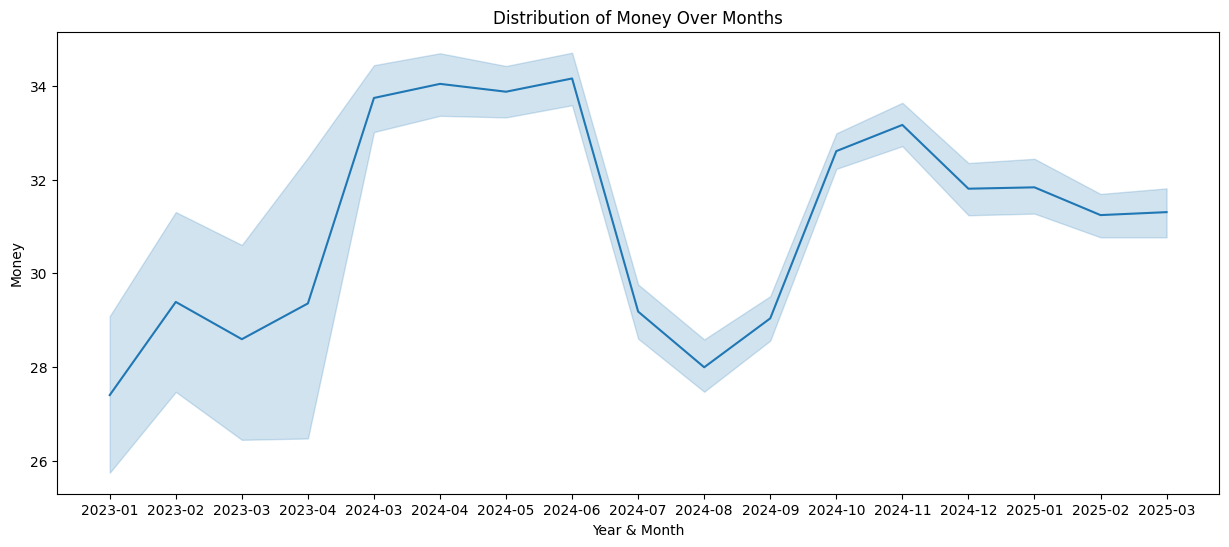

In [86]:
#15 Distribution of money over months
combined_data['YearMonth'] = combined_data['Date'].dt.strftime('%Y-%m')
plt.figure(figsize=(15,6))
plot_months=sns.lineplot(x='YearMonth',y='money',data=combined_data)
plot_months.set_xlabel("Year & Month")
plot_months.set_ylabel("Money")
plot_months.set_title("Distribution of Money Over Months")
plt.show()


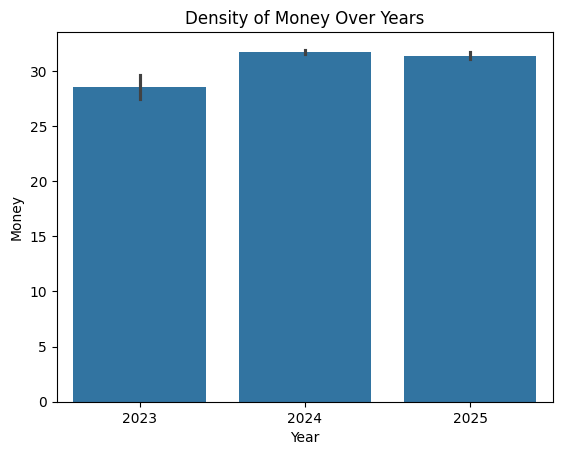

In [87]:
#16 The density of money over years
plot_years=sns.barplot(data= combined_data,x='Year',y= combined_data['money'])
plot_years.set_ylabel("Money")
plot_years.set_title("Density of Money Over Years")
plt.show()


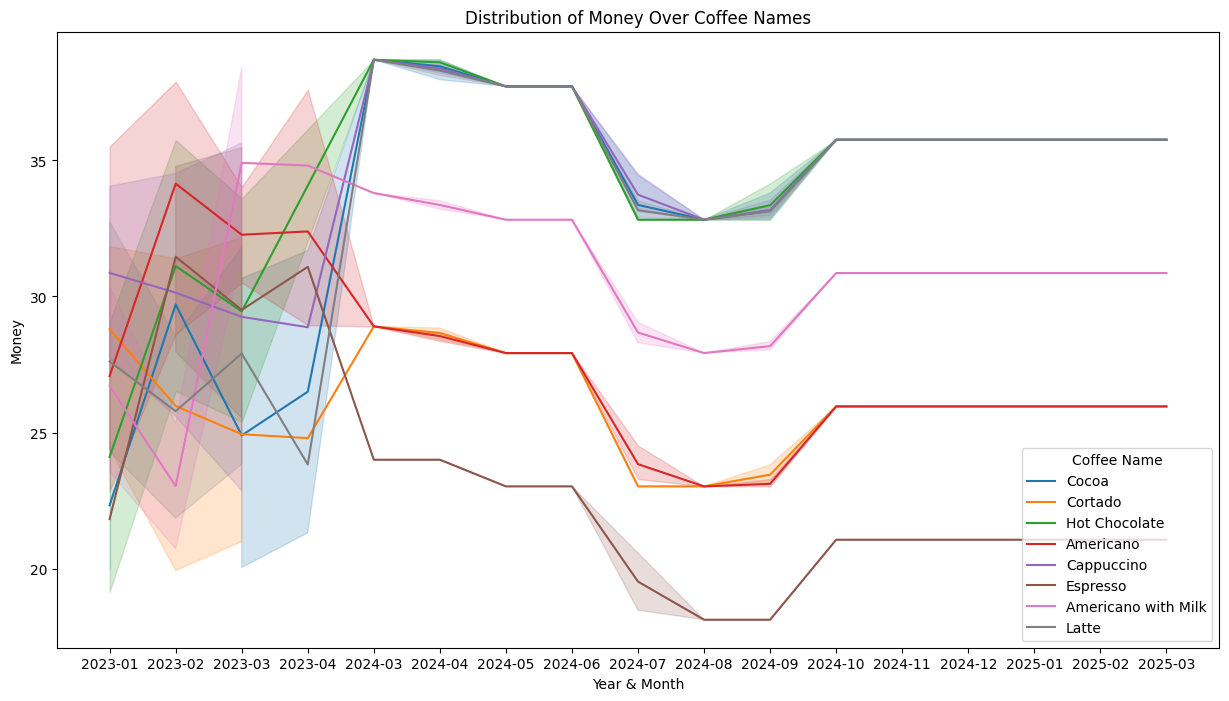

In [88]:
#17  Find the distribution of money over coffee names:
monthly_data=combined_data.groupby(['Year','Month','Month_name','coffee_name'])['money'].sum()
monthly_data
plt.figure(figsize=(15,8))
plot_coffee=sns.lineplot(x='YearMonth',y='money', hue='coffee_name', data=combined_data)
plt.legend(title="Coffee Name")
plot_coffee.set_xlabel("Year & Month")
plot_coffee.set_ylabel("Money")
plot_coffee.set_title("Distribution of Money Over Coffee Names")

plt.show()

In [89]:
#18.Times of the Day the dataset holds:
combined_data['Time_of_Day'].value_counts()


,count
Time_of_Day,
Afternoon,1231
Morning,1226
Night,1190


In [90]:
#19 How many types of coffees are present in the dataset?

#To know coffee names
types_of_coffee=combined_data['coffee_name'].unique()
types_of_coffee

#To know no of coffee types
no_of_types_of_coffee=combined_data['coffee_name'].nunique()
no_of_types_of_coffee



8

In [91]:
#20 Max money from coffee_name:
combined_data.groupby('coffee_name')['money'].max()

,money
coffee_name,
Americano,37.892418
Americano with Milk,38.399654
Cappuccino,38.700000
Cocoa,38.700000
Cortado,34.033338
Espresso,37.467697
Hot Chocolate,38.700000
Latte,38.700000


In [92]:
 #21 Find the average money made at what time of the day.
avg_money_at_diff_times_of_day=combined_data.groupby('Time_of_Day')['money'].mean()
avg_money_at_diff_times_of_day


,money
Time_of_Day,
Afternoon,31.569085
Morning,30.384986
Night,32.759768


# **Further data analysis may leave us in a indefinite trap.(ref-Q7)**